# Heart Disease Prediction – Exploratory Data Analysis (EDA)

## Objective
Perform exploratory data analysis on the UCI Heart Disease dataset to:
- Understand feature distributions
- Detect missing values and outliers
- Analyze correlations between features
- Examine class balance of the target variable

This analysis supports feature engineering and model selection for a heart disease prediction system.


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Display settings
pd.set_option("display.max_columns", None)


In [11]:
# Fetch Heart Disease dataset from UCI repository
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
# Dataset metadata
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

In [9]:
# Variable information
heart_disease.variables


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [12]:
print("Dataset Shape:", df.shape)
print("\nData Types:")
df.dtypes


Dataset Shape: (303, 14)

Data Types:


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [13]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
df['num'].value_counts()


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [15]:
# Binary target conversion
df['target'] = (df['num'] > 0).astype(int)

df['target'].value_counts()


target
0    164
1    139
Name: count, dtype: int64

In [16]:
# Check missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


ca      4
thal    2
dtype: int64

In [17]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)


age         0.00
sex         0.00
cp          0.00
trestbps    0.00
chol        0.00
fbs         0.00
restecg     0.00
thalach     0.00
exang       0.00
oldpeak     0.00
slope       0.00
ca          1.32
thal        0.66
num         0.00
target      0.00
dtype: float64

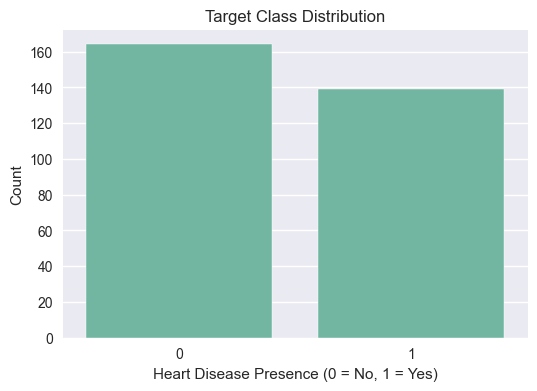

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


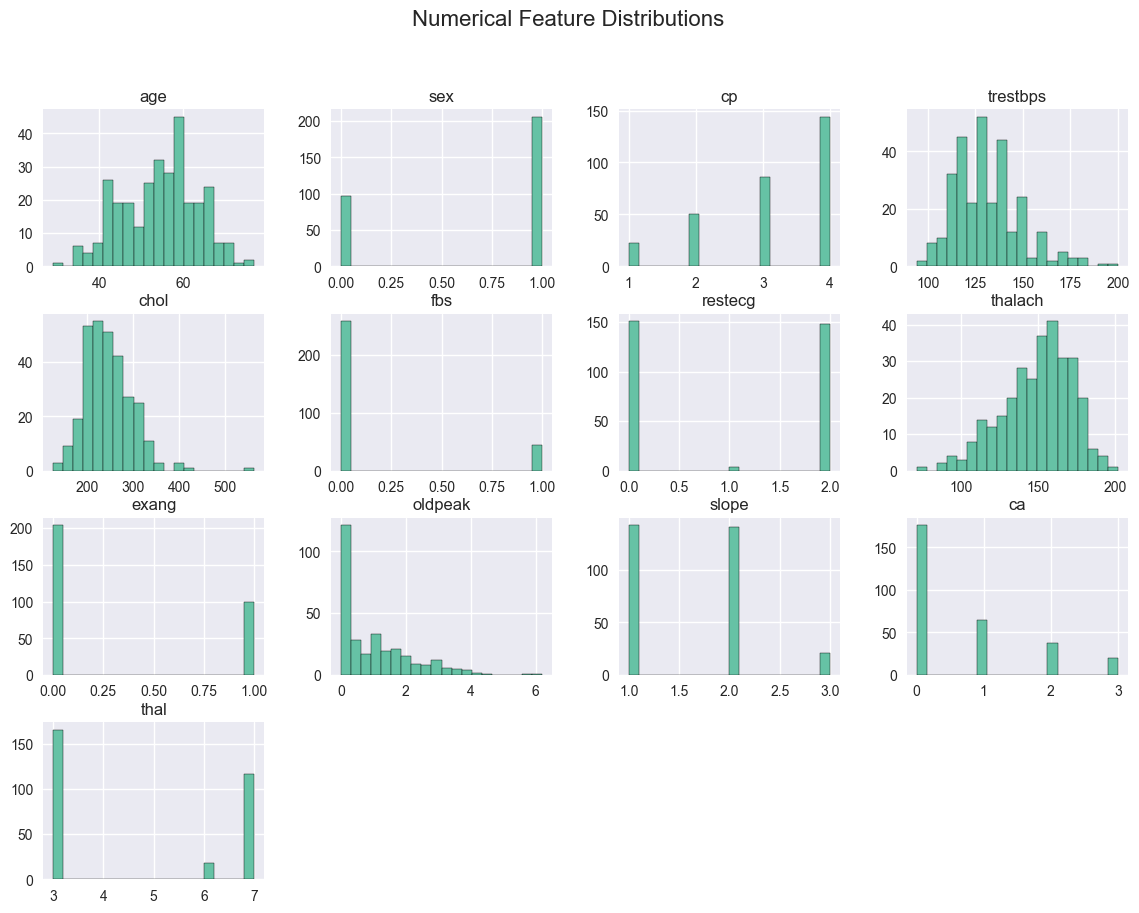

In [19]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove("target")
numerical_features.remove("num")

df[numerical_features].hist(
    figsize=(14, 10),
    bins=20,
    edgecolor="black"
)
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()


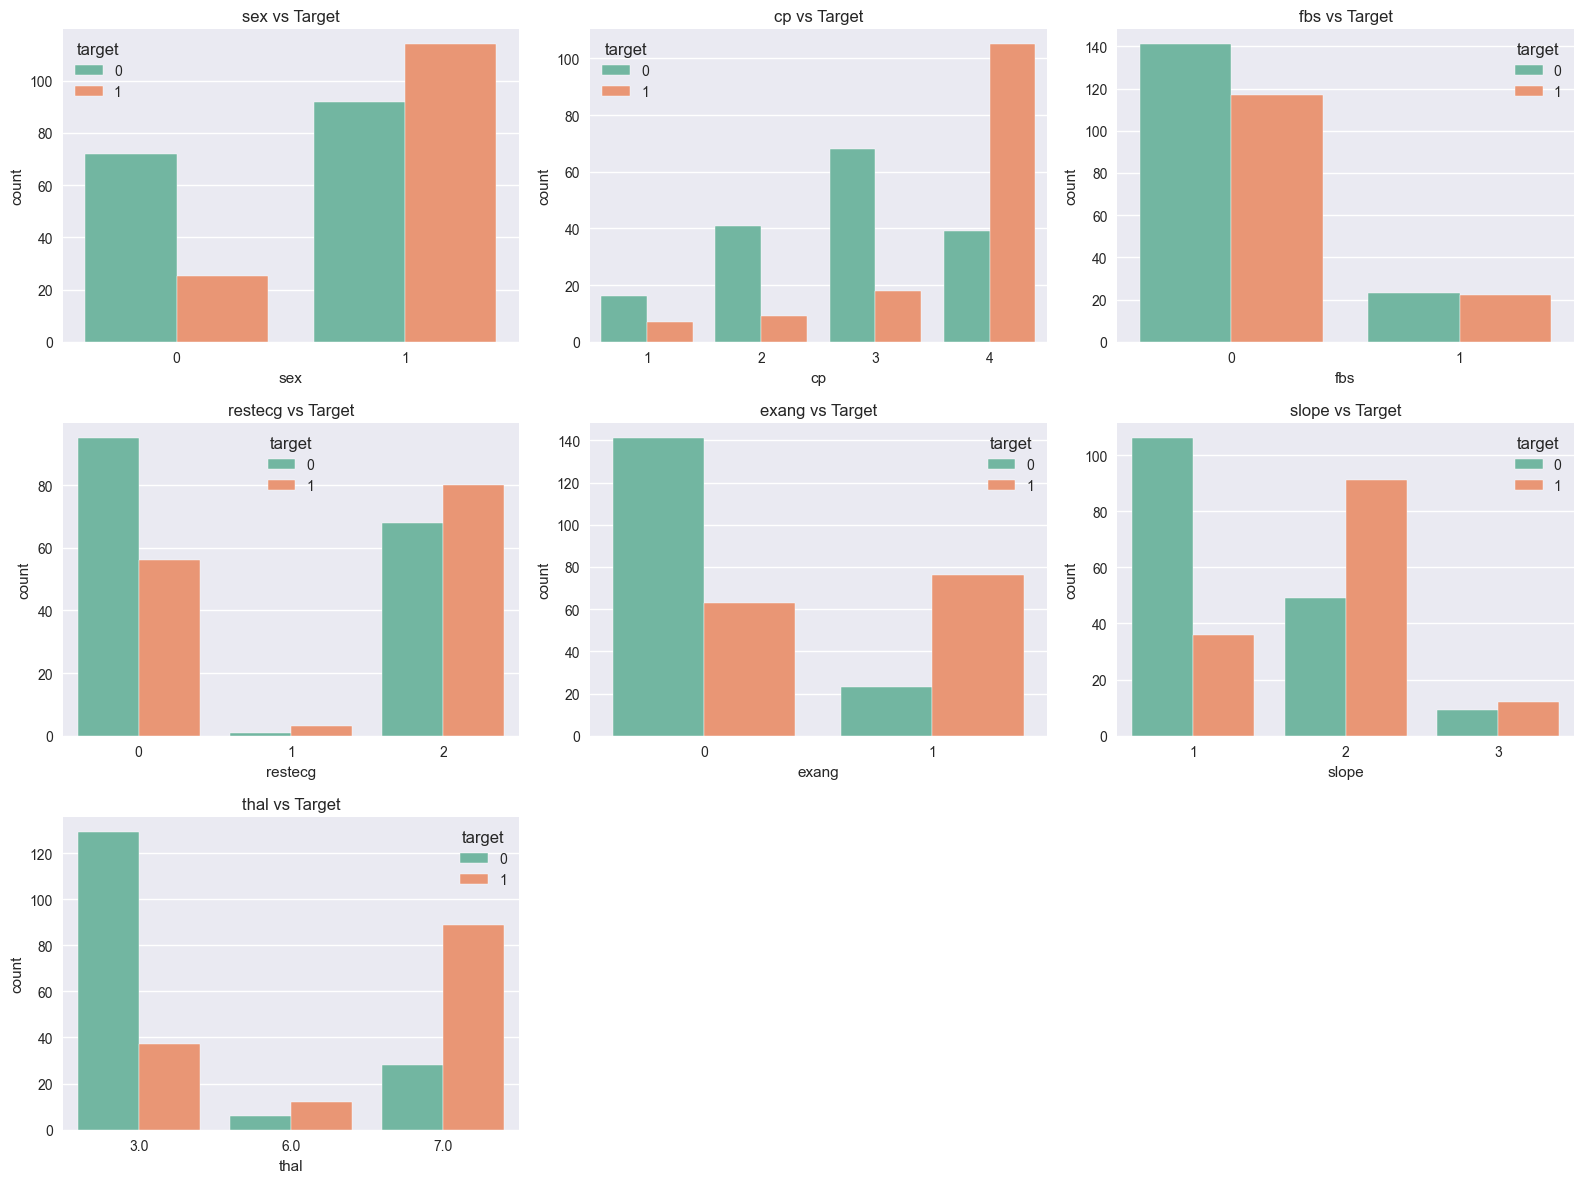

In [20]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue="target", data=df)
    plt.title(f"{col} vs Target")

plt.tight_layout()
plt.show()


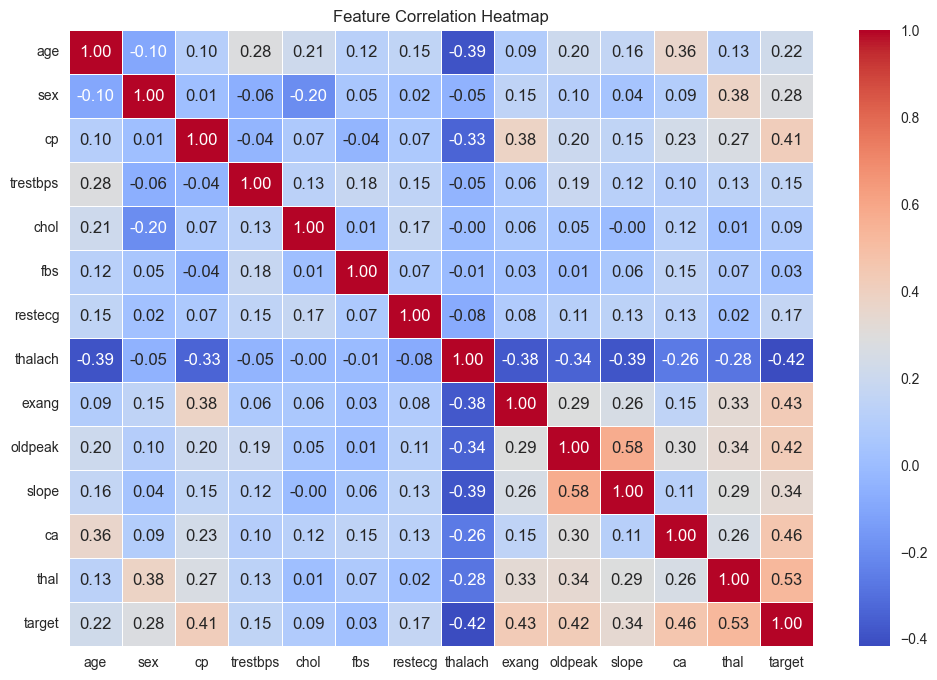

In [21]:
plt.figure(figsize=(12, 8))
corr = df[numerical_features + ['target']].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()


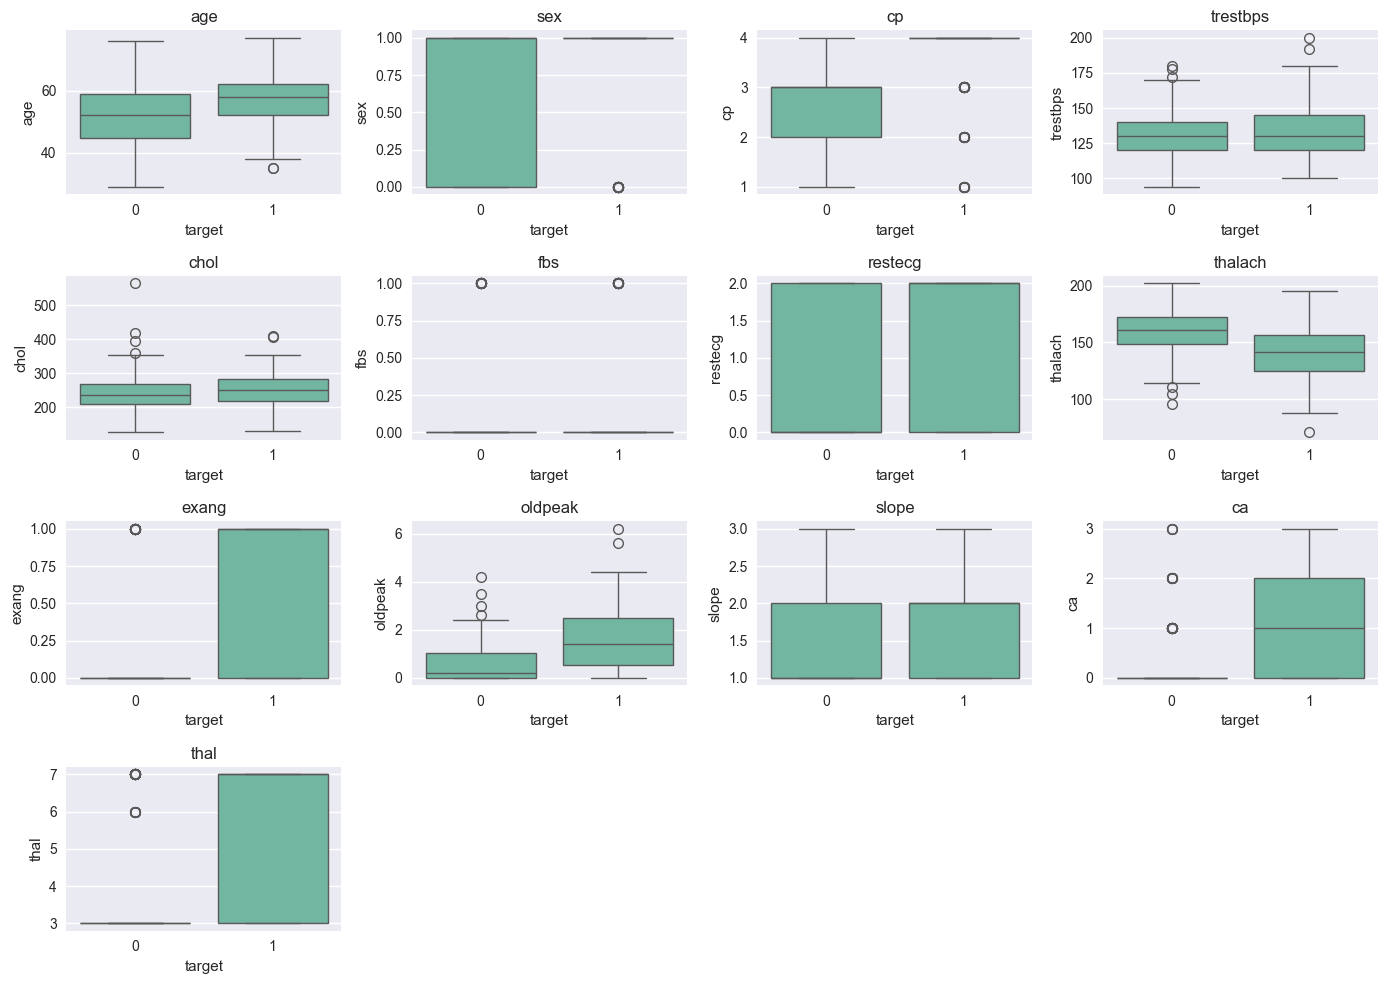

In [22]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x="target", y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


In [24]:
# Drop original multi-class target
df_clean = df.drop(columns=["num"])

# Save processed dataset
df_clean.to_csv("../data/processed/heart_disease_cleaned.csv", index=False)

print("✅ Cleaned dataset saved successfully")


✅ Cleaned dataset saved successfully


In [28]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


## Key Insights from EDA

- The dataset shows a moderate class imbalance.
- Several numerical features (age, cholesterol, resting BP) show wide variance.
- Certain features such as chest pain type and maximum heart rate show strong relationships with heart disease presence.
- Missing values are present and will be handled during preprocessing.
- Feature scaling will be required due to differing value ranges.

These insights guide feature engineering and model selection in subsequent steps.
